Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking). Ensemble methods can be divided into two groups: *sequential* ensemble methods where the base learners are generated sequentially (e.g. AdaBoost) and *parallel* ensemble methods where the base learners are generated in parallel (e.g. Random Forest). The basic motivation of sequential methods is to exploit the dependence between the base learners since the overall performance can be boosted by weighing previously mislabeled examples with higher weight.  The basic motivation of parallel methods is to exploit independence between the base learners since the error can be reduced dramatically by averaging. 

Most ensemble methods use a single base learning algorithm to produce homogeneous base learners, i.e. learners of the same type leading to *homogeneous ensembles*. There are also some methods that use heterogeneous learners, i.e. learners of different types, leading to *heterogeneous ensembles*. In order for ensemble methods to be more accurate than any of its individual members the base learners have to be as accurate as possible and as diverse as possible.


In [1]:
import processing
import ds
import ml
import model_saving
import TS

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
filename = '/home/octo/Dropbox'+ '/SPY21Dec.csv'

In [3]:
import numpy as np
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing_feb(data)
data_km=ml.kalman_ma(data)
data['UD']=np.where(data.Close.diff(12)>0,1,-1)
data['C-km']=data.Close-data_km #np.where(data.Close>data_km,1,-1)

In [4]:
data=data.dropna()
data=data[5:29001]

In [5]:
data=data.drop(['askPrice','askSize','bidPrice','bidSize','vwap'],axis=1)

In [ ]:
data_en[500:505]

In [ ]:
len(data_en)

## Adding technical Indicator

In [6]:
import pandas as pd
import talib

In [7]:
data['rsi']=talib.RSI(np.array(data.Close.astype('float64')))

In [8]:
data['atr']=talib.ATR(np.array(data.High.astype('float64')),np.array(data.Low.astype('float64')),np.array(data.Close.astype('float64')),timeperiod=20)

In [9]:
data['mom']=talib.MOM(np.array(data.Close.astype('float64')), timeperiod=5)

In [10]:
data.tail()

,Open,Close,High,Low,Volume,trade,liq,spread,vel,return,UD,C-km,rsi,atr,mom
2017-12-22 03:41:51.497027,268.08499,268.07999,268.09000,268.07001,188.00000,176.00000,0.01001,-0.00470,-0.00500,0.00007,-1,0.00090,54.11617,0.01751,0.00497
2017-12-22 03:41:53.210189,268.08499,268.08499,268.09000,268.07001,276.00000,264.00000,0.01001,-0.00476,0.00000,0.00007,1,0.00534,67.78888,0.01763,0.00998
2017-12-22 03:41:54.958019,268.08499,268.08499,268.09000,268.07001,276.00000,264.00000,0.01001,-0.00476,0.00000,0.00007,1,0.00483,67.78888,0.01775,0.00998
2017-12-22 03:41:56.973721,268.08499,268.08499,268.09000,268.07001,276.00000,264.00000,0.01001,-0.00476,0.00000,0.00007,1,0.00438,67.78888,0.01786,0.00998
2017-12-22 03:41:59.170309,268.08002,268.08499,268.09000,268.07001,276.00000,264.00000,0.01999,-0.00955,0.00000,0.00007,1,0.00443,67.78888,0.01797,0.00500


## ML

In [11]:
data=data.drop(['Open','Close','High','Low','Volume',],axis=1)

In [12]:
data=data.dropna()

In [13]:
data.head()

,trade,liq,spread,vel,return,UD,C-km,rsi,atr,mom
2017-12-21 20:00:11.833786,90.00000,0.01001,-0.00488,-0.01999,0.00004,-1,0.24327,75.96017,0.01902,0.00500
2017-12-21 20:00:12.074544,90.00000,0.00000,0.00000,-0.01498,0.00004,-1,0.21946,75.96017,0.01907,0.00000
2017-12-21 20:00:12.083926,80.00000,0.00000,0.00000,-0.00998,0.00004,1,0.20298,83.24657,0.01912,0.00500
2017-12-21 20:00:12.092357,80.00000,0.00998,-0.00394,-0.00497,0.00011,1,0.18309,83.24657,0.01966,0.00500
2017-12-21 20:00:12.100888,-6.00000,0.00998,0.00186,0.00000,0.00011,1,0.17010,87.58432,0.01968,0.00998


In [14]:
X=data[['trade','vel','spread','liq','rsi','atr','mom','C-km']]
Y=data.UD

### TREE

In [16]:
# training set and test set
split_percentage=0.7
split=int(split_percentage*len(data))
X_train=X[:split]
Y_train=Y[:split]
X_test=X[split:]
Y_test=Y[split:]

In [17]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
model.score(X_train,Y_train)
#Predict Output
predicted= model.predict(X_test)

In [19]:
model.score(X_test,Y_test)

0.9207408259519153

In [20]:
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(Y_train,model.predict(X_train))
accuracy_test=accuracy_score(Y_test,model.predict(X_test))
print('training set sccuracy: %2.f' %accuracy_train)
print('test set sccuracy: %2.f' %accuracy_test)

training set sccuracy:  1
test set sccuracy:  1


### Bagged Decision Trees

Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train $M$ different trees $f_m$ on different subsets of the data (chosen randomly with replacement) and compute the ensemble:
\begin{equation}
   f(x) = \frac{1}{M}\sum_{m=1}^{M}f_m(x) 
\end{equation}

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.


In [22]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9358456536151604


### Random Forest

Random forest is an extension of bagged decision trees.

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.


http://blog.yhat.com/posts/random-forests-in-python.html
    
https://gist.github.com/glamp/5716253
http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/

https://github.com/saimadhu-polamuri/DataAspirant_codes    

https://dataaspirant.com/

In [51]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 5
num_trees = 15
max_features = 6
kfold = model_selection.KFold(n_splits=8, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9349116510215351


## Extra Trees

Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

The example below provides a demonstration of extra trees with the number of trees set to 100 and splits chosen from 7 random features.


In [26]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9361904094881238


## Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

    AdaBoost
    Stochastic Gradient Boosting


### AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.


In [28]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=20, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9137587267271389


### Stochastic Gradient Boosting

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class.


In [30]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=20, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9260793307634527


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.


In [31]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8346241429641049


https://www.toptal.com/machine-learning/ensemble-methods-machine-learning

### Stacking

https://github.com/viisar/brew

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner

from mlxtend.data import iris_data
#from mlxtend.evaluate import plot_decision_regions

In [83]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)

# Creating Ensemble
ensemble = Ensemble([clf1, clf2, clf3])
eclf = EnsembleClassifier(ensemble=ensemble, combiner=Combiner('mean'))

# Creating Stacking
layer_1 = Ensemble([clf1, clf2, clf3])
layer_2 = Ensemble([sklearn.clone(clf1)])

stack = EnsembleStack(cv=3)

stack.add_layer(layer_1)
stack.add_layer(layer_2)

sclf = EnsembleStackClassifier(stack)

clf_list = [clf1, clf2, clf3, eclf, sclf]
lbl_list = ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble', 'Stacking']

In [90]:
x=X[2000:5000]
y=Y[2000:5000]
x=x.values
y=y.values

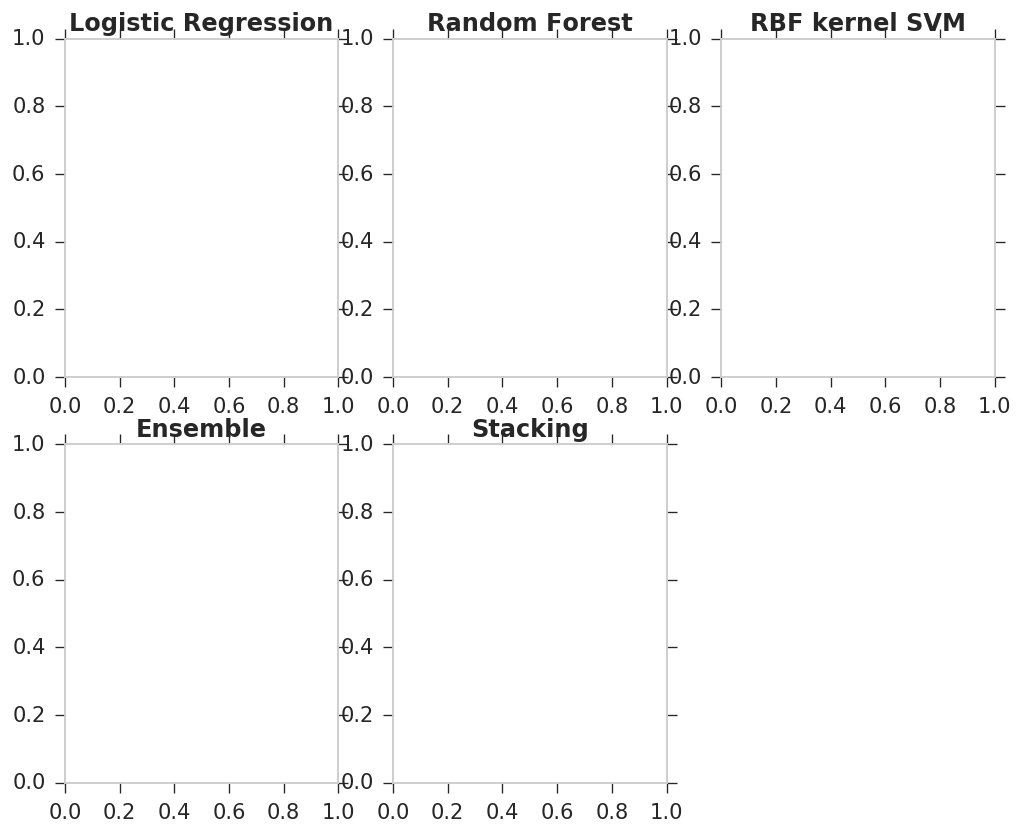

In [94]:
# WARNING, WARNING, WARNING
# brew requires classes from 0 to N, no skipping allowed
#d = {yi : i for i, yi in enumerate(set(y))}
#y = np.array([d[yi] for yi in y])

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 8))

itt = itertools.product([0, 1, 2], repeat=2)

for clf, lab, grd in zip(clf_list, lbl_list, itt):
    clf.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X=x, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

https://github.com/vecxoz/vecstack

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [16]:
# Make train/test split
# As usual in machine learning task we have X_train, y_train, and X_test
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
    test_size = 0.2, random_state = 0)

In [17]:
# Caution! All models and parameter values are just 
# demonstrational and shouldn't be considered as recommended.
# Initialize 1st level models.
models = [
    ExtraTreesClassifier(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 3),
        
    RandomForestClassifier(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 3),
        
    XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
        n_estimators = 100, max_depth = 3)]
    
# Compute stacking features
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = accuracy_score, n_folds = 4, 
    stratified = True, shuffle = True, random_state = 0, verbose = 2)

# Initialize 2nd level model
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
    n_estimators = 100, max_depth = 3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

task:       [classification]
n_classes:  [2]
metric:     [accuracy_score]
mode:       [oof_pred_bag]
n_models:   [3]

model 0:    [ExtraTreesClassifier]
    fold 0: [0.74413389]
    fold 1: [0.75168248]
    fold 2: [0.73960311]
    fold 3: [0.74111149]
    ----
    MEAN:   [0.74413274] + [0.00465414]
    FULL:   [0.74413287]

model 1:    [RandomForestClassifier]
    fold 0: [0.89182195]
    fold 1: [0.90163934]
    fold 2: [0.89767041]
    fold 3: [0.89782534]
    ----
    MEAN:   [0.89723926] + [0.00350847]
    FULL:   [0.89723900]

model 2:    [XGBClassifier]
    fold 0: [0.92701863]
    fold 1: [0.93183779]
    fold 2: [0.92786885]
    fold 3: [0.92699344]
    ----
    MEAN:   [0.92842968] + [0.00199897]
    FULL:   [0.92842968]

Final prediction score: [0.93271222]


## Stacking Kagle
https://www.dataquest.io/blog/introduction-to-ensembles/

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
### Import data
# Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

In [20]:
### Training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_train_test(df,drop,test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(drop, axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

In [21]:
X.head()

,trade,vel,spread,liq,rsi,atr,mom,C-km
2017-12-21 20:00:11.833786,90.00000,-0.01999,-0.00488,0.01001,75.96017,0.01902,0.00500,0.24327
2017-12-21 20:00:12.074544,90.00000,-0.01498,0.00000,0.00000,75.96017,0.01907,0.00000,0.21946
2017-12-21 20:00:12.083926,80.00000,-0.00998,0.00000,0.00000,83.24657,0.01912,0.00500,0.20298
2017-12-21 20:00:12.092357,80.00000,-0.00497,-0.00394,0.00998,83.24657,0.01966,0.00500,0.18309
2017-12-21 20:00:12.100888,-6.00000,0.00000,0.00186,0.00998,87.58432,0.01968,0.00998,0.17010


### Theory of ensemble
http://flennerhag.com/2017-04-18-introduction-to-ensembles/

https://www.dataquest.io/blog/content/images/2018/01/features.svg

    

In [37]:
# Make train/test split
# As usual in machine learning task we have X_train, y_train, and X_test
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.2, random_state = 0)


In [32]:
import pydotplus  # you can install pydotplus with: pip install pydotplus 
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D",1: "U"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())

Decision tree ROC-AUC score: 0.966


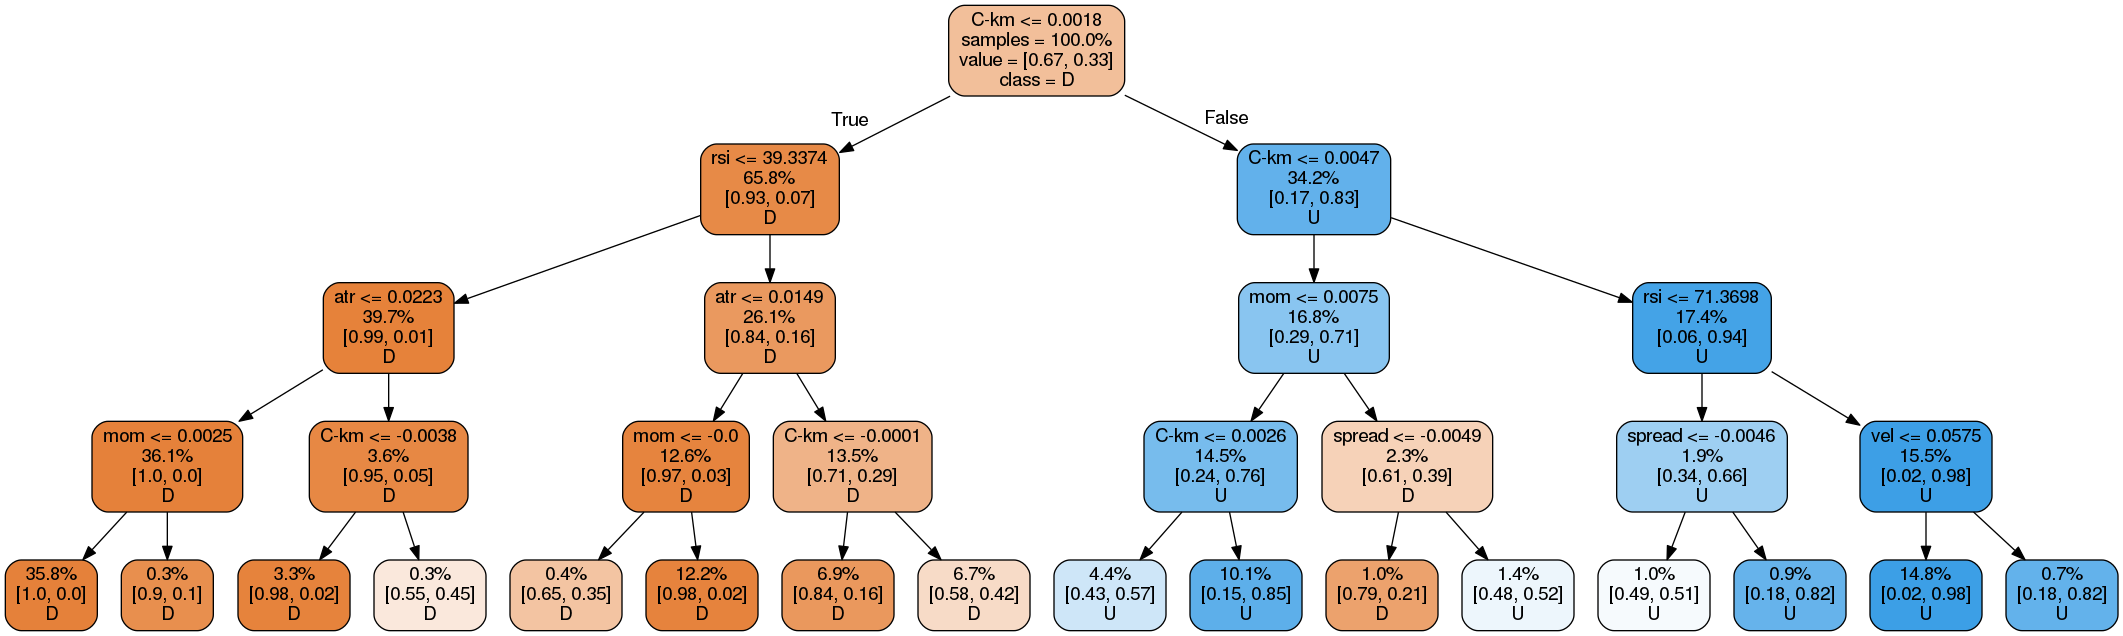

In [38]:
t1 = DecisionTreeClassifier(max_depth=4, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, xtrain.columns)

### Test: Dropping the root

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X.drop(['vel'],axis=1),Y,test_size = 0.2, random_state = 0)

Decision tree ROC-AUC score: 0.923


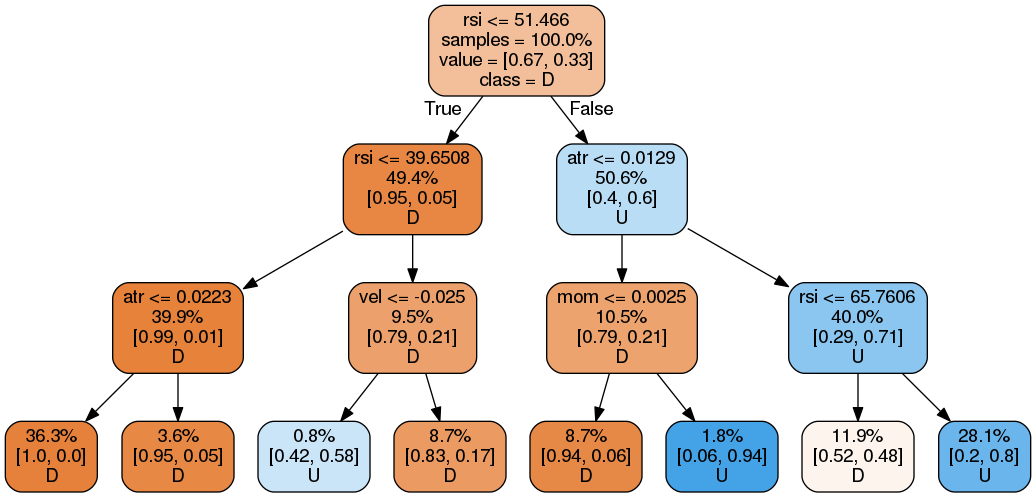

In [36]:
t1 = DecisionTreeClassifier(max_depth=4, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, xtrain.columns)

### RF
http://scikit-learn.org/stable/modules/ensemble.html#forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=6,
    random_state=SEED
)

rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.988


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [58]:
predictions=rf.predict(xtest)

In [60]:
print ("Test Accuracy  :: ", accuracy_score(ytest, predictions))
print (" Confusion matrix ", confusion_matrix(ytest, predictions))

Test Accuracy  ::  0.9532436162870945
 Confusion matrix  [[3793  123]
 [ 148 1732]]


In [52]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")
    

In [53]:
models = get_models()
P = train_predict(models)
score_models(P, ytest)

Fitting models.
random forest... done
knn... done
svm... done
gbm... done
logistic... done
mlp-nn... done
naive bayes... done
Done.

Scoring models.
random forest             : 0.988
knn                       : 0.874
svm                       : 0.822
gbm                       : 0.985
logistic                  : 0.942
mlp-nn                    : 0.885
naive bayes               : 0.906
Done.



In [54]:
X.describe()

,trade,vel,spread,liq,rsi,atr,mom,C-km
count,28976.00000,28976.00000,28976.00000,28976.00000,28976.00000,28976.00000,28976.00000,28976.00000
mean,50.88967,0.00086,-0.00060,0.00998,51.26890,0.01660,0.00007,0.00021
std,183.72232,0.02225,0.00393,0.00464,31.33437,0.00367,0.00622,0.00637
min,-760.00000,-0.10001,-0.02441,-0.04001,0.00000,0.00948,-0.07001,-0.05411
25%,-59.00000,-0.01001,-0.00415,0.00998,25.07952,0.01397,0.00000,-0.00294
50%,12.00000,0.00000,-0.00027,0.01001,52.37595,0.01644,0.00000,0.00003
75%,207.00000,0.01498,0.00302,0.01001,77.74429,0.01896,0.00000,0.00331
max,687.00000,0.07999,0.02890,0.07999,100.00000,0.04390,0.04501,0.24327


In [55]:
Y.describe()

count   28976.00000
mean       -0.34408
std         0.93896
min        -1.00000
25%        -1.00000
50%        -1.00000
75%         1.00000
max         1.00000
Name: UD, dtype: float64

[MLENS] backend: threading


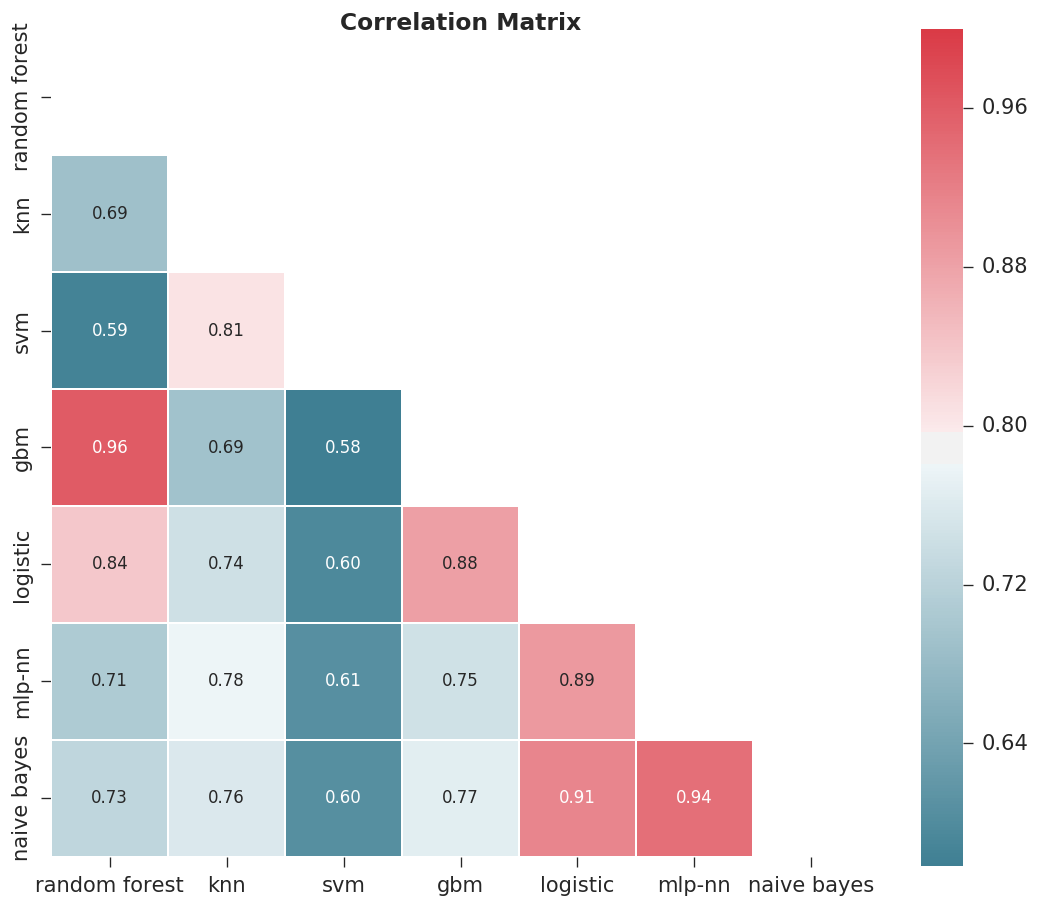

In [61]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

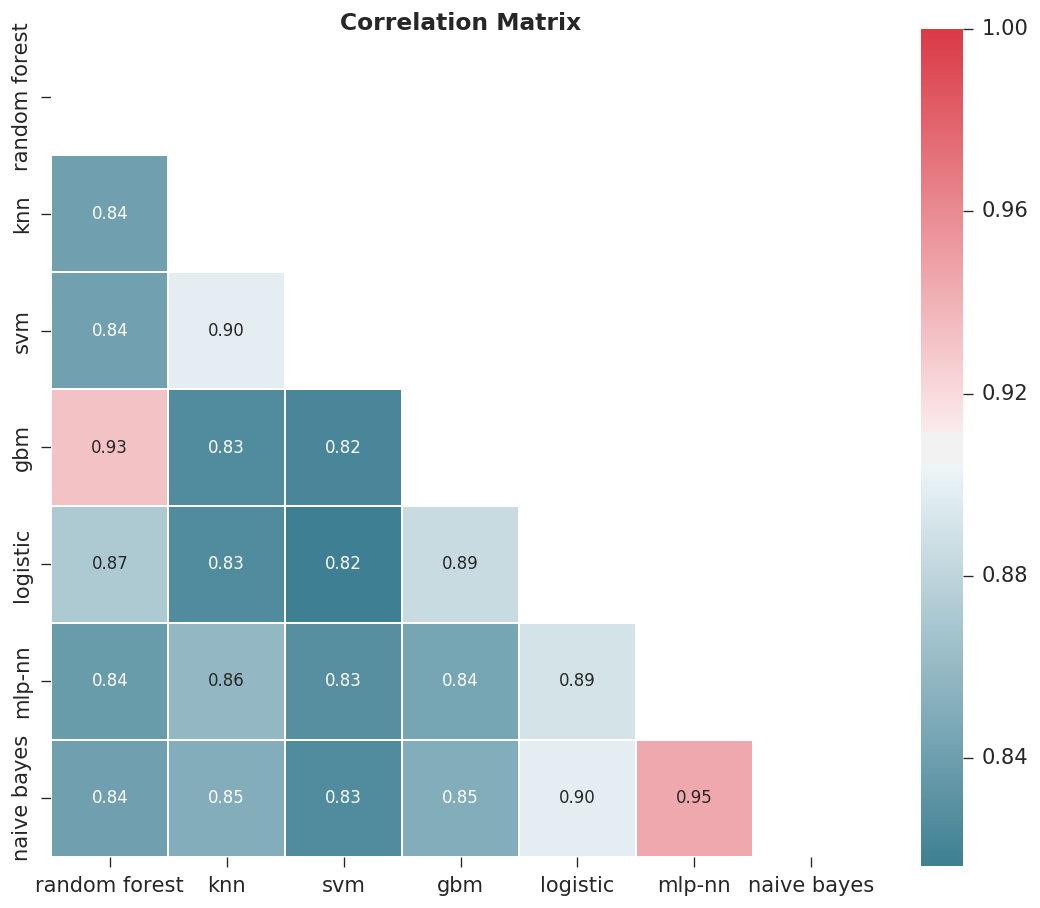

In [62]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

In [63]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.972


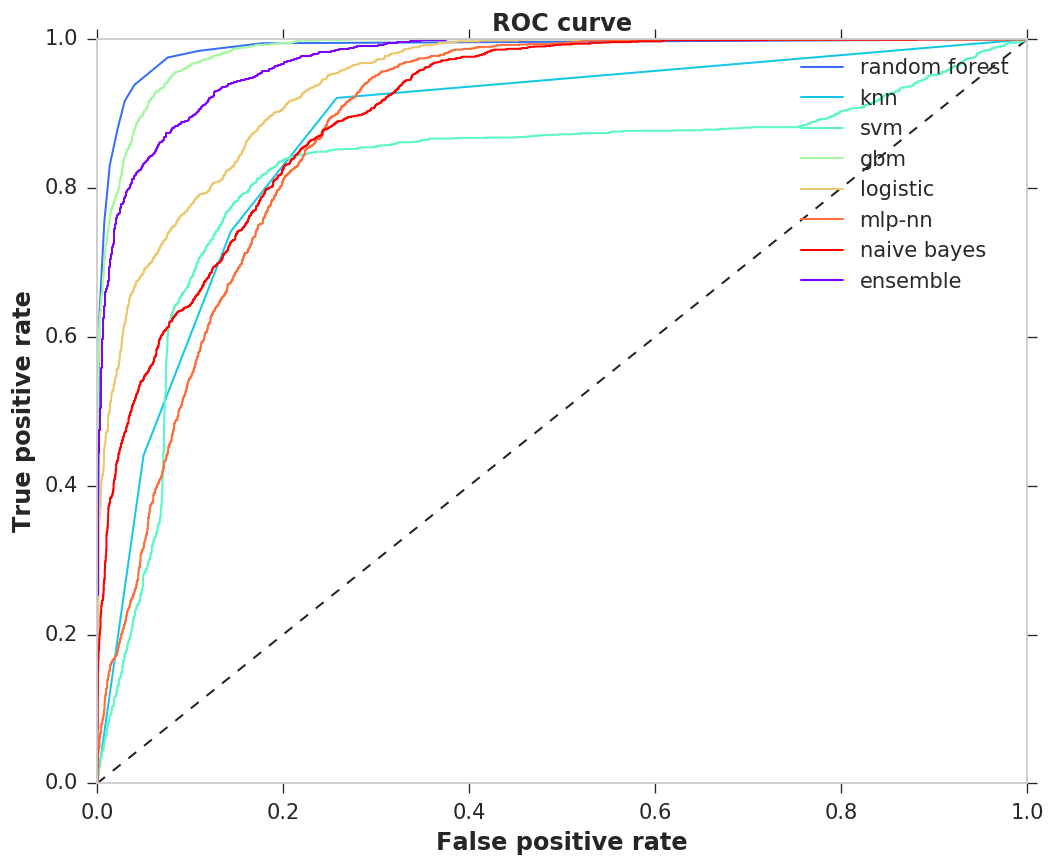

In [64]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), "ensemble")

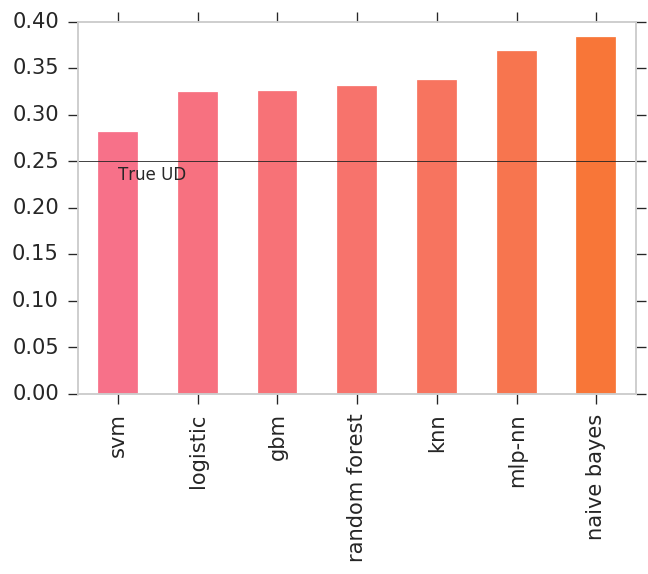

In [65]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["U", "D"]
p.loc["D", :].sort_values().plot(kind="bar")
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.23, "True UD")
plt.show()

Implementing an ensemble
To build this type of ensemble, we need three things:

a library of base learners that generate predictions
a meta learner that learns how to best combine these predictions
a method for splitting the training data between the base learners and the meta learner.
Base learners are the ingoing models that take the original input and generate a set of predictions. If we have an original data set ordered as a matrix 
X
X of shape (n_samples, n_features), the library of base learners output a new prediction matrix 
P
base
Pbase of size (n_samples, n_base_learners), where each column represent the predictions made by one of the base learners. The meta learner is trained on 
P
base
Pbase.

This means that it is absolutely crucial to handle the training set 
X
X in an appropriate way. In particular, if we both train the base learners on 
X
X and have them predict 
X
X, the meta learner will be training on the base learner's training error, but at test time it will face their test errors.

We need a strategy for generating a prediction matrix 
P
P that reflects test errors. The simplest strategy is to split the full data set 
X
X in two: train the base learners on one half and have them predict the other half, which then becomes the input to the meta learner. While simple and relatively fast, we loose quite a bit of data. For small and medium sized data sets, the loss of information can be severe, causing the base learners and the meta learner to perform poorly.

To ensure the full data set is covered, we can use cross-validation, a method initially developed for validating test-set performance during model selection. There are many ways to perform cross-validation, and before we delve into that, let's get a feel for this type of ensemble by implementing one ourselves, step by step.



### Step 1: define a library of base learners

In [66]:
base_learners = get_models()

### Step 2: define a meta learner

Here, we'll use a Gradient Boosting Machine. To ensure the GBM explores local patterns, we restricting each of 1000 decision trees to train on a random subset of 4 base learners and 50% of input data. This way, the GBM will be exposed to each base learner's strength in different neighborhoods of the input space.

In [67]:
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    random_state=SEED
)

### Step 3: define a procedure for generating train and test sets

In [68]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    xtrain, ytrain, test_size=0.5, random_state=SEED)

### Step 4: train the base learners on a training set

In [69]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """Train all base learners in the library."""
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [70]:
train_base_learners(base_learners, xtrain_base, ytrain_base)

Fitting models.
random forest... done
knn... done
svm... done
gbm... done
logistic... done
mlp-nn... done
naive bayes... done


### Step 5: generate base learner predictions

In [71]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """Generate a prediction matrix."""
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [72]:
P_base = predict_base_learners(base_learners, xpred_base)

Generating base learner predictions.
random forest... done
knn... done
svm... done
gbm... done
logistic... done
mlp-nn... done
naive bayes... done


In [73]:
meta_learner.fit(P_base, ypred_base)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='exponential', max_depth=3,
              max_features=4, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=222,
              subsample=0.5, verbose=0, warm_start=False)

In [74]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """Generate predictions from the ensemble."""
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [75]:
P_pred, p = ensemble_predict(base_learners, meta_learner, xtest)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Generating base learner predictions.
random forest... done
knn... done
svm... done
gbm... done
logistic... done
mlp-nn... done
naive bayes... done

Ensemble ROC-AUC score: 0.989


### Training with cross-validation

During cross-validated training of the base learners, a copy of each base learner is fitted on 
K
−
1
K−1 folds, and predict the left-out fold. This process is iterated until every fold has been predicted. The more folds we specify, the less data is being left out in each training pass. This makes cross-validated predictions less noisy and a better reflection of performance during test time. The cost is significantly increased training time. Fitting an ensemble with cross-validation is often referred to as stacking, while the ensemble itself is known as the Super Learner.

To understand how cross-validation works, we can think of it as an outer loop over our previous ensemble. The outer loop iterates over 
K
K distinct test folds, with the remaining data used for training. The inner loop trains the base learners and generate predictions for the held-out data. 

In [77]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y, verbose=False)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest, verbose=False)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")
    
    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner

In [78]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), xtrain.values, ytrain.values, KFold(2))

P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, xtest, verbose=False)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Fitting final base learners...done
Generating cross-validated predictions...
Fold 1 done
Fold 2 done
CV-predictions done
Fitting meta learner...done

Ensemble ROC-AUC score: 0.984


Stacking comes with its own set of shortcomings, particularly speed. In general, we need to be aware of there important issues when it comes to implementing ensembles with cross-validation:

Computational complexity
Structural complexity (risk of information leakage)
Memory consumption

### Super Learners

In [79]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(xtrain, ytrain)

# Predict the test set
p_sl = sl.predict_proba(xtest)

print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(ytest, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:33:52
Processing layer-2             done | 00:00:09
Fit complete                        | 00:34:03

Predicting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02

Super Learner ROC-AUC score: 0.992


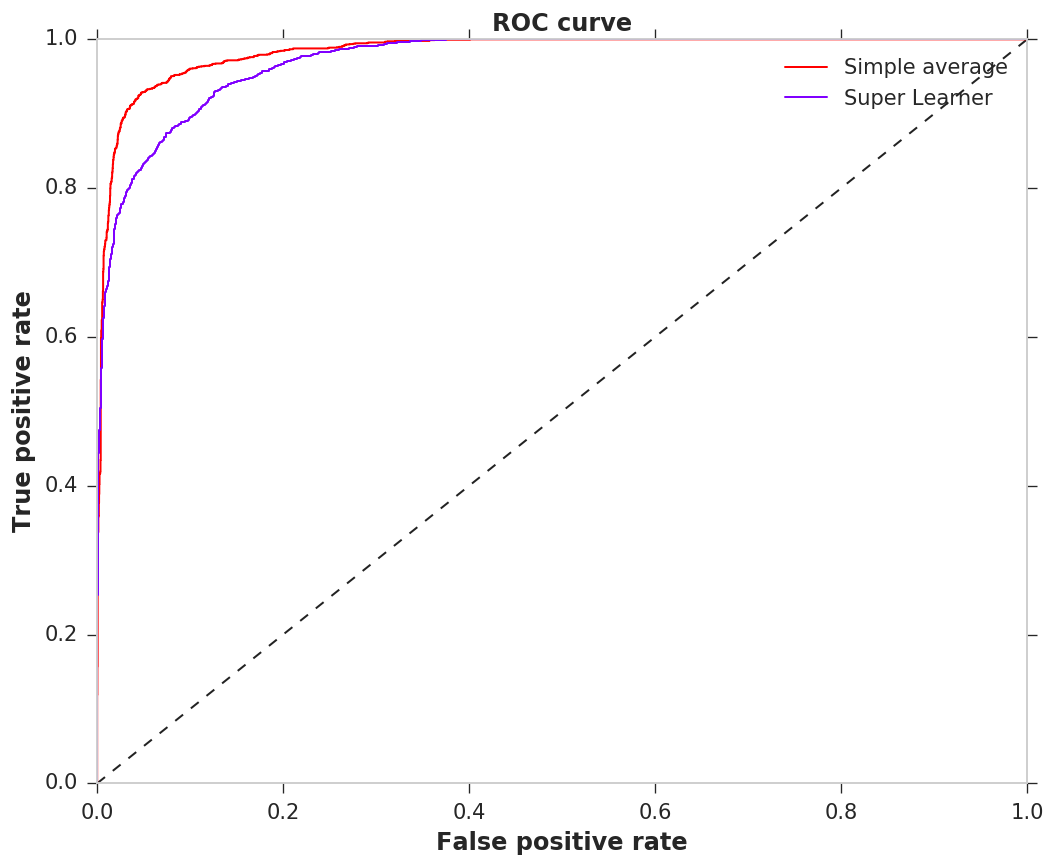

In [80]:
plot_roc_curve(ytest, p.reshape(-1, 1), P.mean(axis=1), ["Simple average"], "Super Learner")

### ANother
http://beatingthebenchmark.blogspot.in/
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

Combine Model Predictions Into Ensemble Predictions
The three most popular methods for combining the predictions from different models are:

Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

Bagged Decision Trees
Random Forest
Extra Trees

##### folder at atsL2P2 : experiments_with_python
https://blog.statsbot.co/ensemble-learning-d1dcd548e936

https://github.com/vsmolyakov/experiments_with_python

http://localhost:8888/notebooks/Dropbox/trading_system/atsL2P2/experiments_with_python/chp01/ensemble_methods.ipynb

### Introduction to Ensembling/Stacking in Python
https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
    

    https://mlwave.com/kaggle-ensembling-guide/
    https://github.com/MLWave/Kaggle-Ensemble-Guide/tree/master/src
    https://stackoverflow.com/questions/28727709/ensemble-of-different-kinds-of-regressors-using-scikit-learn-or-any-other-pytho
    https://blog.statsbot.co/ensemble-learning-d1dcd548e936
    https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
    https://github.com/emanuele/kaggle_pbr/blob/master/blend.py
    http://sebastianraschka.com/Articles/2014_ensemble_classifier.html
    https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
    
    